In [1]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1163, Validation 300
             Close
count  1464.000000
mean   4342.706626
std    1360.992648
min    1860.000000
25%    3350.000000
50%    3862.500000
75%    5225.000000
max    7450.000000


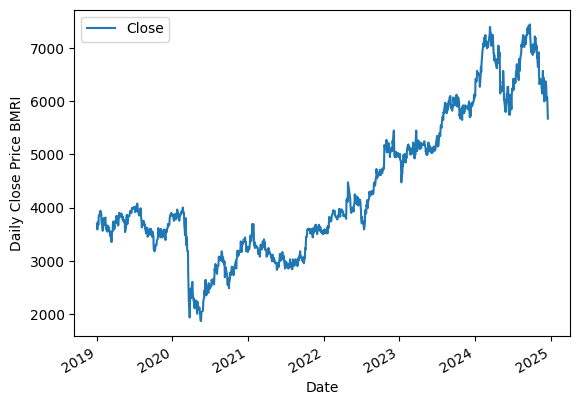

In [2]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BMRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Close Price BMRI")
pyplot.show()

                 1
count  1163.000000
mean   3787.358126
std     874.551140
min    1860.000000
25%    3175.000000
50%    3675.000000
75%    4125.000000
max    6100.000000


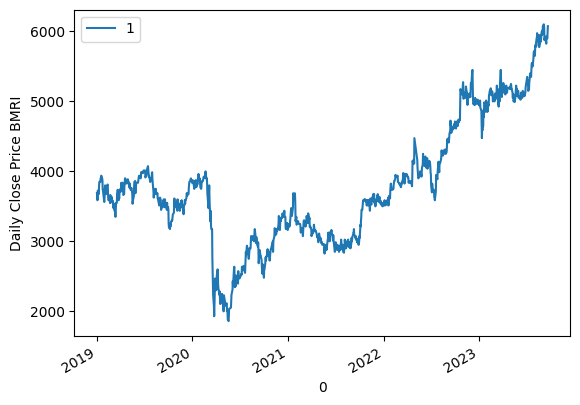

In [3]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Close Price BMRI")
pyplot.show()

                 1
count   300.000000
mean   6491.166667
std     503.998532
min    5650.000000
25%    6018.750000
50%    6425.000000
75%    7000.000000
max    7450.000000


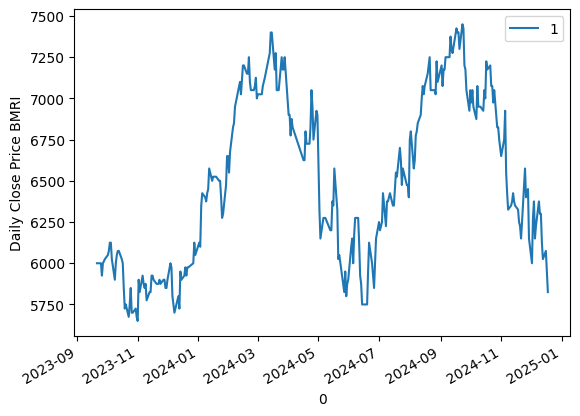

In [4]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Close Price BMRI")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_16688\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


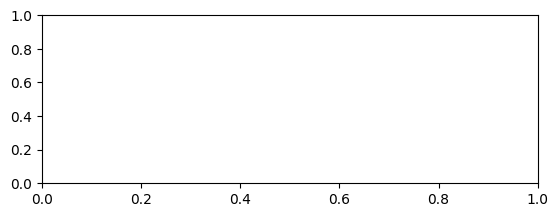

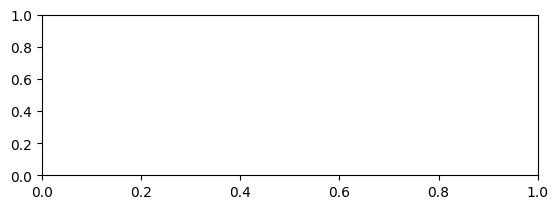

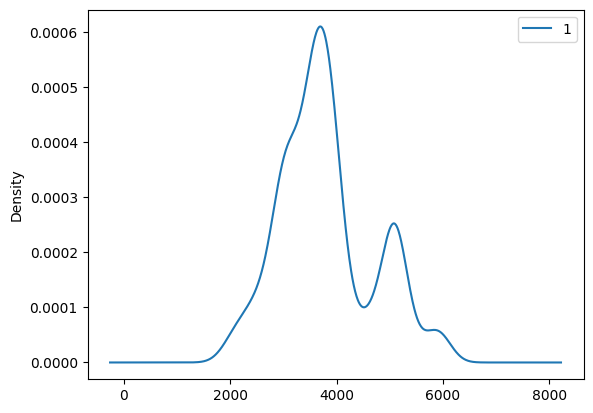

In [5]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [6]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [7]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [8]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 71.935


In [9]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [10]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 72.309


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                0
count  582.000000
mean     5.217765
std     72.182266
min   -341.034668
25%    -34.737671
50%      2.734497
75%     46.733032
max    367.223633


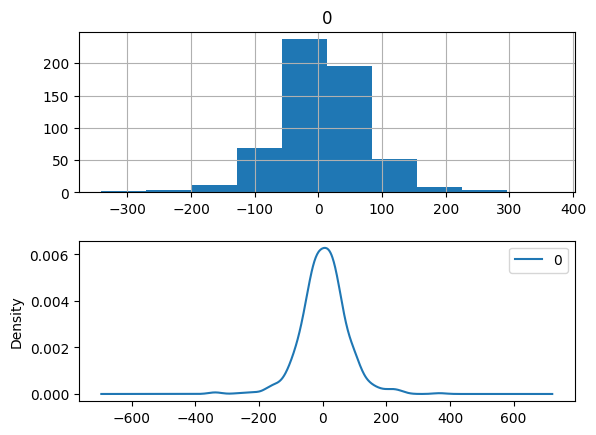

In [11]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [12]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

5.217764854431152


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 72.120
                0
count  582.000000
mean    -0.000003
std     72.182274
min   -346.252441
25%    -39.955444
50%     -2.483276
75%     41.515320
max    362.005859


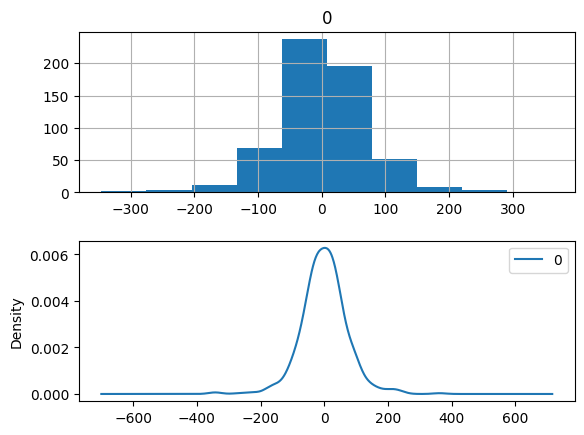

In [13]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 72.120
                0
count  582.000000
mean    -0.000003
std     72.182274
min   -346.252441
25%    -39.955444
50%     -2.483276
75%     41.515320
max    362.005859


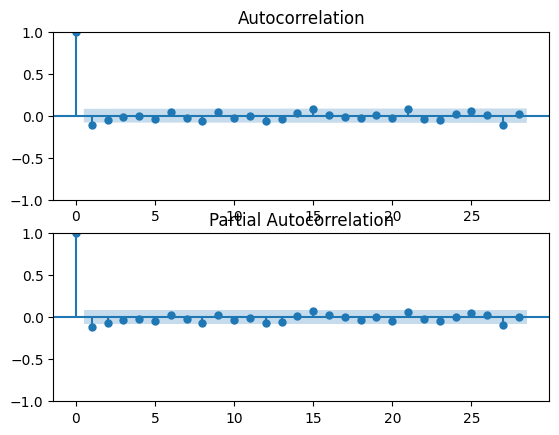

In [14]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [15]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [16]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 6073.480


# try on evaluation data

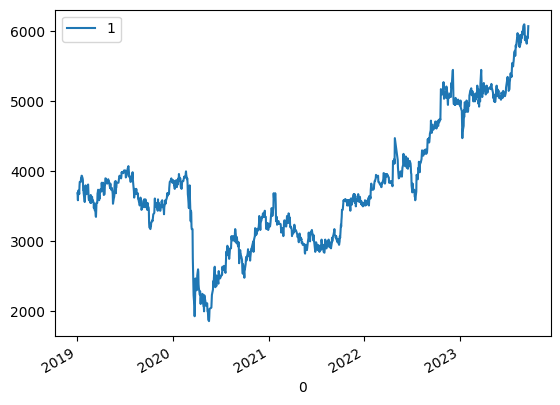

,1
0,
2019-01-01,3687.5
2019-01-02,3662.5
2019-01-03,3587.5
2019-01-04,3725.0
2019-01-07,3712.5
...,...
2023-09-14,5825.0
2023-09-15,5925.0
2023-09-18,5900.0


In [17]:
series.plot()
pyplot.show()
series

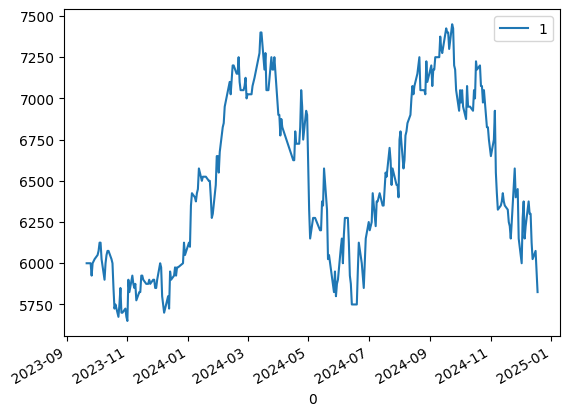

,1
0,
2023-09-21,6000.0
2023-09-22,6000.0
2023-09-25,6000.0
2023-09-26,5925.0
2023-09-27,6000.0
...,...
2024-12-12,6125.0
2024-12-13,6025.0
2024-12-16,6075.0


In [18]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=6073.480, Expected=6000.000
>Predicted=6005.152, Expected=6000.000
>Predicted=6005.181, Expected=6000.000
>Predicted=6005.197, Expected=5925.000
>Predicted=5934.003, Expected=6000.000
>Predicted=6003.522, Expected=6025.000
>Predicted=6027.982, Expected=6050.000
>Predicted=6052.678, Expected=6075.000
>Predicted=6077.512, Expected=6125.000
>Predicted=6126.166, Expected=6125.000
>Predicted=6127.936, Expected=6025.000
>Predicted=6033.991, Expected=5900.000
>Predicted=5913.473, Expected=6000.000
>Predicted=6005.027, Expected=6050.000
>Predicted=6052.568, Expected=6075.000
>Predicted=6077.411, Expected=6075.000
>Predicted=6078.582, Expected=6025.000
>Predicted=6031.819, Expected=6000.000
>Predicted=6007.423, Expected=5850.000
>Predicted=5864.008, Expected=5725.000
>Predicted=5741.049, Expected=5750.000
>Predicted=5760.534, Expected=5675.000
>Predicted=5686.698, Expected=5750.000
>Predicted=5755.606, Expected=5850.000
>Predicted=5850.914, Expected=5700.000
>Predicted=5709.855, Expe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


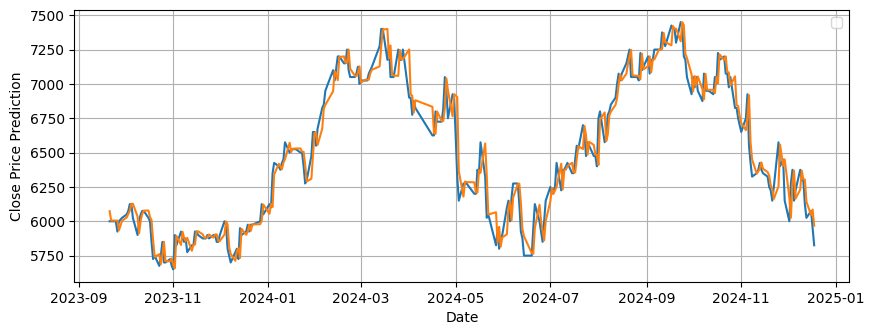

In [19]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()

In [20]:
validation

,1
0,
2023-09-21,6000.0
2023-09-22,6000.0
2023-09-25,6000.0
2023-09-26,5925.0
2023-09-27,6000.0
...,...
2024-12-12,6125.0
2024-12-13,6025.0
2024-12-16,6075.0


In [21]:
y[:,0].shape

(300,)

In [22]:
predictions_flat.shape

(300,)

>Predicted=6075.000, Expected=6000
>Predicted=6000.000, Expected=6000
>Predicted=6000.000, Expected=6000
>Predicted=6000.000, Expected=5925
>Predicted=5925.000, Expected=6000
>Predicted=6000.000, Expected=6025
>Predicted=6025.000, Expected=6050
>Predicted=6050.000, Expected=6075
>Predicted=6075.000, Expected=6125
>Predicted=6125.000, Expected=6125
>Predicted=6125.000, Expected=6025
>Predicted=6025.000, Expected=5900
>Predicted=5900.000, Expected=6000
>Predicted=6000.000, Expected=6050
>Predicted=6050.000, Expected=6075
>Predicted=6075.000, Expected=6075
>Predicted=6075.000, Expected=6025
>Predicted=6025.000, Expected=6000
>Predicted=6000.000, Expected=5850
>Predicted=5850.000, Expected=5725
>Predicted=5725.000, Expected=5750
>Predicted=5750.000, Expected=5675
>Predicted=5675.000, Expected=5750
>Predicted=5750.000, Expected=5850
>Predicted=5850.000, Expected=5700
>Predicted=5700.000, Expected=5700
>Predicted=5700.000, Expected=5725
>Predicted=5725.000, Expected=5675
>Predicted=5675.000,

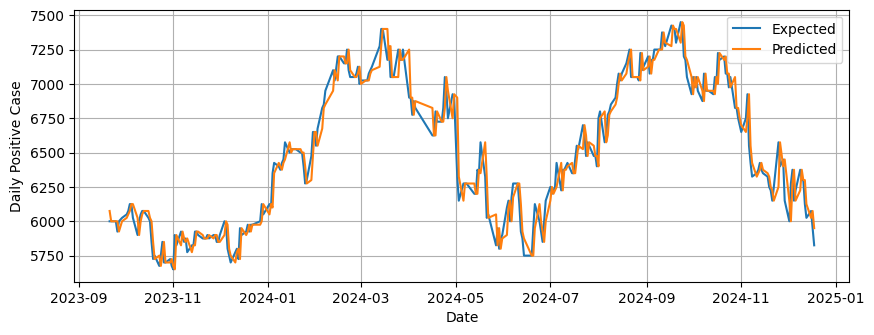

In [23]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

# try on test data

                0
count  732.000000
mean     2.824091
std     95.440430
min   -573.880371
25%    -43.467407
50%      1.226562
75%     50.908081
max    367.223633


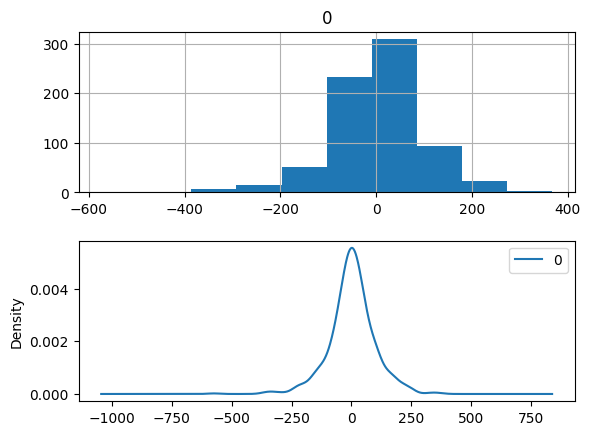

2.8240907192230225


In [24]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BMRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [25]:
# save finalized model

# load data
series = read_csv('../../Dataset/BMRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=6002.758, Expected=6000.000
>Predicted=6002.787, Expected=6000.000
>Predicted=6002.803, Expected=5925.000
>Predicted=5931.609, Expected=6000.000
>Predicted=6001.129, Expected=6025.000
>Predicted=6025.588, Expected=6050.000
>Predicted=6050.284, Expected=6075.000
>Predicted=6075.118, Expected=6125.000
>Predicted=6123.772, Expected=6125.000
>Predicted=6125.542, Expected=6025.000
>Predicted=6031.597, Expected=5900.000
>Predicted=5911.079, Expected=6000.000
>Predicted=6002.633, Expected=6050.000
>Predicted=6050.175, Expected=6075.000
>Predicted=6075.017, Expected=6075.000
>Predicted=6076.188, Expected=6025.000
>Predicted=6029.425, Expected=6000.000
>Predicted=6005.029, Expected=5850.000
>Predicted=5861.615, Expected=5725.000
>Predicted=5738.655, Expected=5750.000
>Predicted=5758.140, Expected=5675.000
>Predicted=5684.304, Expected=5750.000
>Predicted=5753.212, Expected=5850.000
>Predicted=5848.521, Expected=5700.000
>Predicted=5707.462, Expected=5700.000
>Predicted=5705.547, Expe

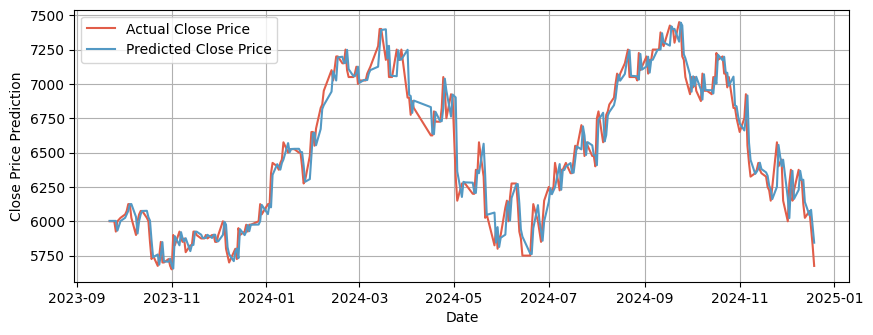

In [26]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()

>Predicted=6000.000, Expected=6000
>Predicted=6000.000, Expected=6000
>Predicted=6000.000, Expected=5925
>Predicted=5925.000, Expected=6000
>Predicted=6000.000, Expected=6025
>Predicted=6025.000, Expected=6050
>Predicted=6050.000, Expected=6075
>Predicted=6075.000, Expected=6125
>Predicted=6125.000, Expected=6125
>Predicted=6125.000, Expected=6025
>Predicted=6025.000, Expected=5900
>Predicted=5900.000, Expected=6000
>Predicted=6000.000, Expected=6050
>Predicted=6050.000, Expected=6075
>Predicted=6075.000, Expected=6075
>Predicted=6075.000, Expected=6025
>Predicted=6025.000, Expected=6000
>Predicted=6000.000, Expected=5850
>Predicted=5850.000, Expected=5725
>Predicted=5725.000, Expected=5750
>Predicted=5750.000, Expected=5675
>Predicted=5675.000, Expected=5750
>Predicted=5750.000, Expected=5850
>Predicted=5850.000, Expected=5700
>Predicted=5700.000, Expected=5700
>Predicted=5700.000, Expected=5725
>Predicted=5725.000, Expected=5675
>Predicted=5675.000, Expected=5650
>Predicted=5650.000,

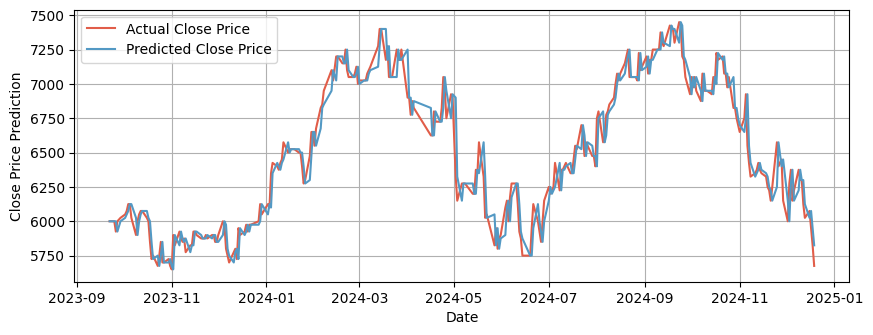

In [27]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()